<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Минимизируемая функция:

$$f(x,y) = 2x^2-1.05x^4+x^6/6+xy+y^2$$

при $y=1$.

Диапазон поиска минимума: $[-2, 2]$

Точность $eps =0.001$

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

In [58]:
input_data = ['2*x**2 - 1.05*x**4 + x**6/6 +x*1 + 1**2', [-2, 2], 0.001]

In [59]:
def parse_formula(formula_str):
    x = sp.symbols('x')
    func = sp.sympify(formula_str)
    return sp.lambdify((x), func, 'numpy')

In [60]:
def find_closest_elements(input_list, target):
    closest_smaller = float('-inf')
    closest_larger = float('inf')

    for num in input_list:
        if num < target and num > closest_smaller:
            closest_smaller = num
        elif num > target and num < closest_larger:
            closest_larger = num
    return closest_smaller, closest_larger

In [61]:
def find_min(input_data):
    func = parse_formula(input_data[0])
    a, b = input_data[1][0], input_data[1][1]
    eps = input_data[2]

    f = [func(x) for x in np.linspace(a, b, 500)]
    x = np.linspace(a, b, 500)
    diffs = [abs(f[i+1]-f[i]) / (x[i+1]-x[i]) for i in range(len(x)-1)]
    L = max(diffs)*1.2
    
    points = {}
    cl_points = [a,b]
    best_point_x = float('inf')
    best_point_y = float('inf')
    
    # iter A
    a_l = (a, func(a))
    a_r = (b, func(a)-L*(b-(a)))
    # iter B
    b_l = (b, func(b))
    b_r = (a, func(b)+L*(a-b))
    # intersection
    x_per = (func(a) - func(b))/2/L + (a+b)/2
    y_per = func(x_per)
    mid = (x_per, func(x_per))
    
    cl_points.append(mid[0])
    it2_l = (a, func(x_per)+L*(a-x_per))
    it2_r =(b, func(x_per)-L*(b-(x_per)))
    points[mid[0]] =  abs(func(a)-L*(mid[0]-(a)) - func(mid[0]))
    del points[mid[0]]
    
    # draw graph
    plt.figure(figsize=(10,5))
    plt.grid(linewidth=0.3)
    plt.plot(x, f)
    plt.plot((a_l[0], a_r[0]), (a_l[1], a_r[1]), '-', c='g', linewidth=0.5)
    plt.plot((b_l[0], b_r[0]), (b_l[1], b_r[1]), '-', c='g', linewidth=0.5)
    plt.plot(x_per, y_per, '.', c='r')
    plt.text(x_per, y_per+0.15, '2', fontsize=5, ha='left') 
    plt.plot((it2_l[0], mid[0]), (it2_l[1], mid[1]), '-', c='g', linewidth=0.5)
    plt.plot((it2_r[0], mid[0]), (it2_r[1], mid[1]), '-', c='g', linewidth=0.5)
    
    # start iters
    l = a
    r = b
    m = mid[0]
    dif = max(f)
    n = 3
    
    while (abs(dif) > eps):
        
        # first intersection
        x_per1 = (func(l) - func(m))/2/L + (l+m)/2
        y_per1 = func(x_per1)
        mid1 = (x_per1, func(x_per1))
        cl_points.append(mid1[0])
        dif1 = abs(func(l)-L*(x_per1-(l)) - func(x_per1))
        points[mid1[0]] = func(l)-L*(x_per1-(l))
        # second intersection
        x_per2 = (func(m) - func(r))/2/L + (m+r)/2
        y_per2 = func(x_per2)
        mid2 = (x_per2, func(x_per2))
        cl_points.append(mid2[0])
        dif2 = abs(func(m)-L*(x_per2-(m)) - func(x_per2))
        points[mid2[0]] = func(m)-L*(x_per2-(m))
        
        # find new mid point
        new_mid = (min(points, key=points.get), func(min(points, key=points.get)))
        del points[new_mid[0]]
        
        # find neighbor points
        l, r = find_closest_elements(cl_points, new_mid[0])
        m = new_mid[0]
        
        # draw new lines
        it_l = (a, func(new_mid[0])+L*(a-new_mid[0]))
        it_r =(b, func(m)-L*(b-(m)))   
        
        plt.plot(x_per1, y_per1, '.', c='r')
        plt.text(x_per1, y_per1+0.15, str(n), fontsize=5, ha='right') 
        n += 1
        plt.plot(x_per2, y_per2, '.', c='r')
        plt.text(x_per2, y_per2+0.15, str(n), fontsize=5, ha='right') 
        n += 1
        plt.plot((it_l[0], new_mid[0]), (it_l[1], new_mid[1]), '-', c='g', linewidth=0.5)
        plt.plot((it_r[0], new_mid[0]), (it_r[1], new_mid[1]), '-', c='g', linewidth=0.5)
        
        # find difference
        dif = min([dif1, dif2])
        # check minimum
        if func(m) < best_point_y:
            best_point_y = func(m)
            best_point_x = m
            
        
    plt.plot(m, func(m), '*', c='y')
    plt.title('График функции')
    plt.ylim(0,5);
    return min(f), best_point_x, best_point_y#, l1,l2,l3,l4,l5,l6

Найденные координаты минимума функции: x = -1.757693, y = 0.313927


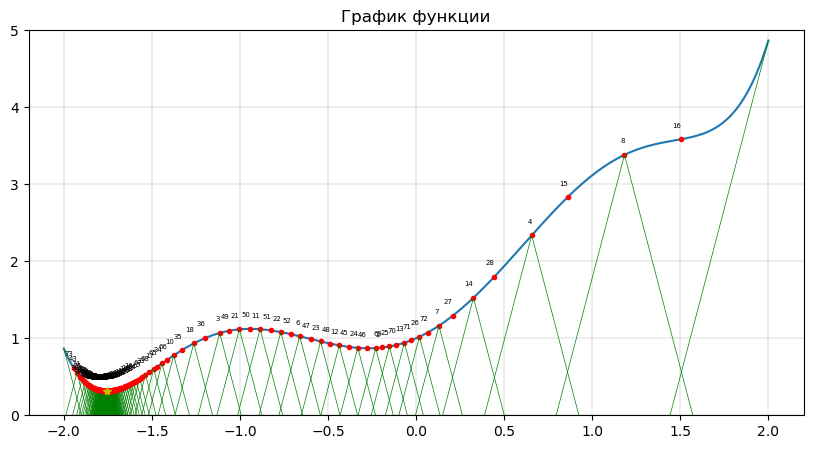

In [78]:
func_min, x_min, y_min  = find_min(input_data)
print(f'Найденные координаты минимума функции: x = {round(x_min, 6)}, y = {round(y_min, 6)}')

Сравнение методов, реализованных на python и в excel:

In [79]:
pd.DataFrame({
    'Реализация': ['Python', 'Excel'],
    'Время работы, c': [1, 47],
    'x_min': [-1.757693, -1.761012],
    'y_min': [0.313927, 0.313998]
             })

,Реализация,"Время работы, c",x_min,y_min
0,Python,1,-1.757693,0.313927
1,Excel,47,-1.761012,0.313998
